<a href="https://colab.research.google.com/github/JuanRaul23/portafolio-ciencia-de-datos/blob/master/eda_cancer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuente de datos: **[Breast Cancer Dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)**, Kaggle

El cáncer de mama es el cáncer más común entre las mujeres en el mundo. Representa el 25% de todos los casos de cáncer y afectó a más de 2,1 millones de personas en 2015. Comienza cuando las células de la mama comienzan a crecer sin control. Estas células suelen formar tumores que se pueden ver en una radiografía o palparse como bultos en el área del seno.

El principal desafío para su detección es cómo clasificar los tumores en malignos (cancerosos) o benignos (no cancerosos).

# Paso 1: Carga de datos

In [ ]:
# Importamos la librería pandas
import pandas as pd

# Cargamos el dataset
data = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')

In [ ]:
# Mostrar las primeras 5 filas del dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Paso 2: Exploración de datos
Vamos a determinar el tipo de datos de cada columna, verificar si hay valores faltantes y obtener estadísticas básicas del conjunto de datos.

In [ ]:
# Información sobre el tipo de datos y valores faltantes
data_info = data.info()

# Estadísticas básicas del conjunto de datos
data_description = data.describe()

data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(None,
                  id  radius_mean  texture_mean  perimeter_mean    area_mean  \
 count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
 mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
 std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
 min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
 25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
 50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
 75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
 max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   
 
        smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 count       569.000000        569.000000      569.000000           569.000000   
 mean          0.096360          0.104341        0.088799             0.048919   
 std           0.014064  

**Aquí están los resultados de la exploración**:

* El dataset tiene 569 entradas y 32 columnas.
* No hay valores faltantes en ninguna columna.
* La mayoría de las columnas son de tipo float64, excepto id que es int64 y diagnosis que es un objeto (probablemente una cadena de caracteres).

**Resumen estadístico**:

* Las columnas (excepto id y diagnosis) contienen medidas relacionadas con las características de las células tumorales.
* Podemos observar estadísticas como la media, la desviación estándar, el valor mínimo, los percentiles 25, 50 y 75, y el valor máximo para cada una de estas columnas. Estas estadísticas nos dan una idea de la distribución y la variabilidad de los datos en cada columna.

# Paso 3: Visualización de datos

1. **Distribución de la variable objetivo (diagnosis)**: Esto nos dará una idea de cuántos casos malignos y benignos hay en el conjunto de datos.

2. **Distribución de algunas características clave**: Seleccionaremos algunas características y visualizaremos su distribución. Esto nos ayudará a entender cómo varían estas características en todo el conjunto de datos.

3. **Correlaciones entre características**: Esto nos mostrará cómo las diferentes características están relacionadas entre sí.

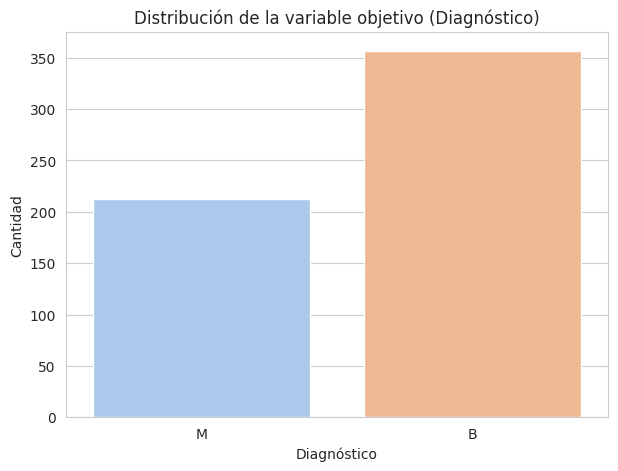

In [ ]:
# Importando matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de Seaborn
sns.set_style("whitegrid")

# Distribución de la variable objetivo 'diagnosis'
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='diagnosis', palette='pastel')
plt.title('Distribución de la variable objetivo (Diagnóstico)')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.show()

La gráfica muestra la distribución de la variable objetivo 'diagnosis'. Podemos observar que hay más tumores benignos (B) que malignos (M) en este conjunto de datos.

A continuación, vamos a visualizar la distribución de algunas características clave. Elegiremos las siguientes:

**1. radius_mean**  
**2. texture_mean**  
**3. area_mean**  
**4. smoothness_mean**  

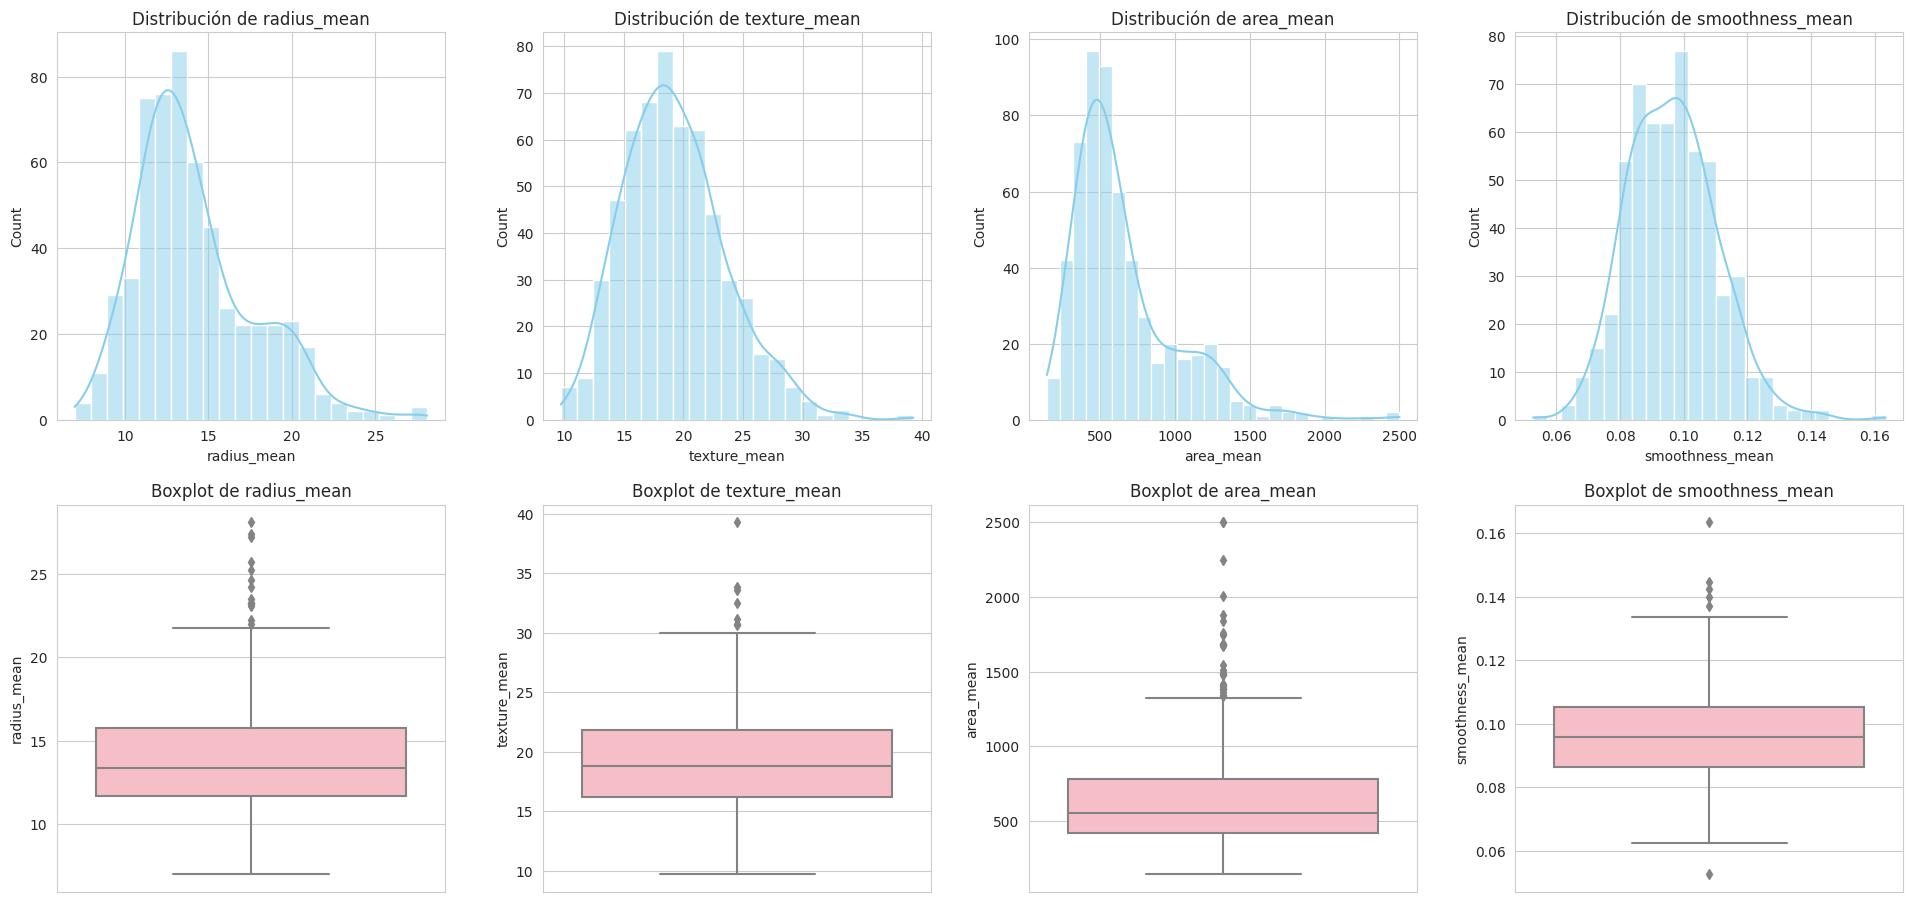

In [ ]:
# Lista de características seleccionadas
features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']

# Visualizar la distribución de las características seleccionadas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Ajustar espacio entre gráficos
fig.tight_layout(pad=4.0)

for i, feature in enumerate(features):
    # Histograma
    sns.histplot(data[feature], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Distribución de {feature}')

    # Boxplot
    sns.boxplot(y=data[feature], ax=axes[1, i], color='lightpink')
    axes[1, i].set_title(f'Boxplot de {feature}')

plt.show()

Aquí están las visualizaciones para las características seleccionadas:

**1. Histogramas**:

* Los histogramas muestran la distribución de las características.
* radius_mean y area_mean tienen una ligera inclinación hacia la derecha, lo que indica que hay algunos valores más grandes que podrían ser outliers.
* texture_mean parece tener una distribución más uniforme.
* smoothness_mean tiene una distribución que se asemeja a una distribución normal.

**2. Boxplots**:

* Los boxplots proporcionan una vista clara de la mediana, los cuartiles y los posibles outliers.
* Para radius_mean y area_mean, podemos ver algunos puntos por encima del bigote superior, lo que sugiere la presencia de outliers.
* texture_mean y smoothness_mean también muestran algunos outliers, pero en menor medida.  

Vamos a examinar las correlaciones entre las características. Esto nos ayudará a entender qué características están relacionadas entre sí y en qué medida. Utilizaremos un mapa de calor para visualizar estas correlaciones.

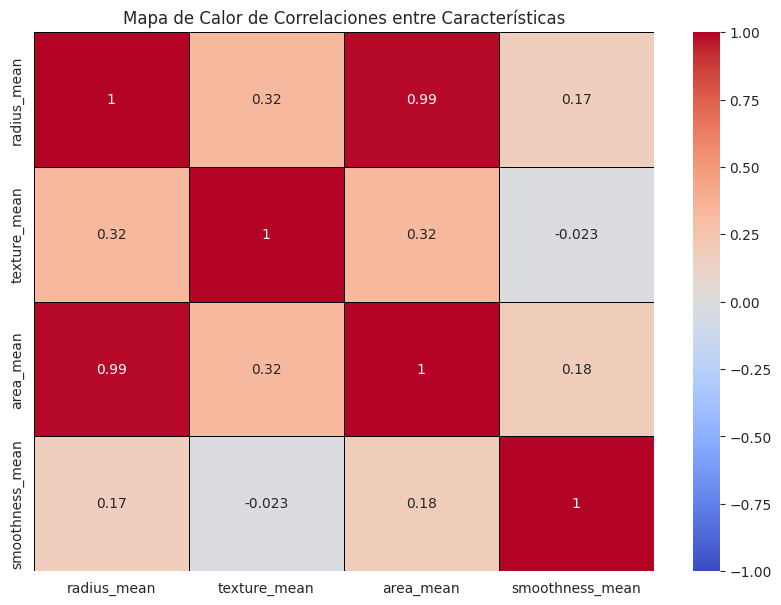

In [ ]:
# Calculando la matriz de correlación
correlation_matrix = data[features].corr()

# Visualizando la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, linecolor='black')
plt.title('Mapa de Calor de Correlaciones entre Características')
plt.show()

El mapa de calor muestra las correlaciones entre las características seleccionadas:

* Los valores cercanos a 1 o -1 indican una correlación fuerte, ya sea positiva o negativa, respectivamente.
* Los valores cercanos a 0 indican una correlación débil.

**Observaciones**:

* **radius_mean** y **area_mean** tienen una correlación muy fuerte (0.99), lo cual tiene sentido ya que un radio más grande generalmente se traduce en un área mayor.  
* **texture_mean** tiene correlaciones moderadas con las otras características, pero no es tan fuerte como la relación entre radius_mean y area_mean.  
* **smoothness_mean** tiene correlaciones débiles con las demás características seleccionadas.

# Paso 4: Análisis de datos

Una de las preguntas interesantes podría ser: ¿Cómo varían las características seleccionadas entre tumores benignos y malignos? Esto podría dar una idea de qué características son más indicativas del tipo de tumor. Vamos a investigar esto comparando las distribuciones de estas características entre los dos tipos de diagnósticos.

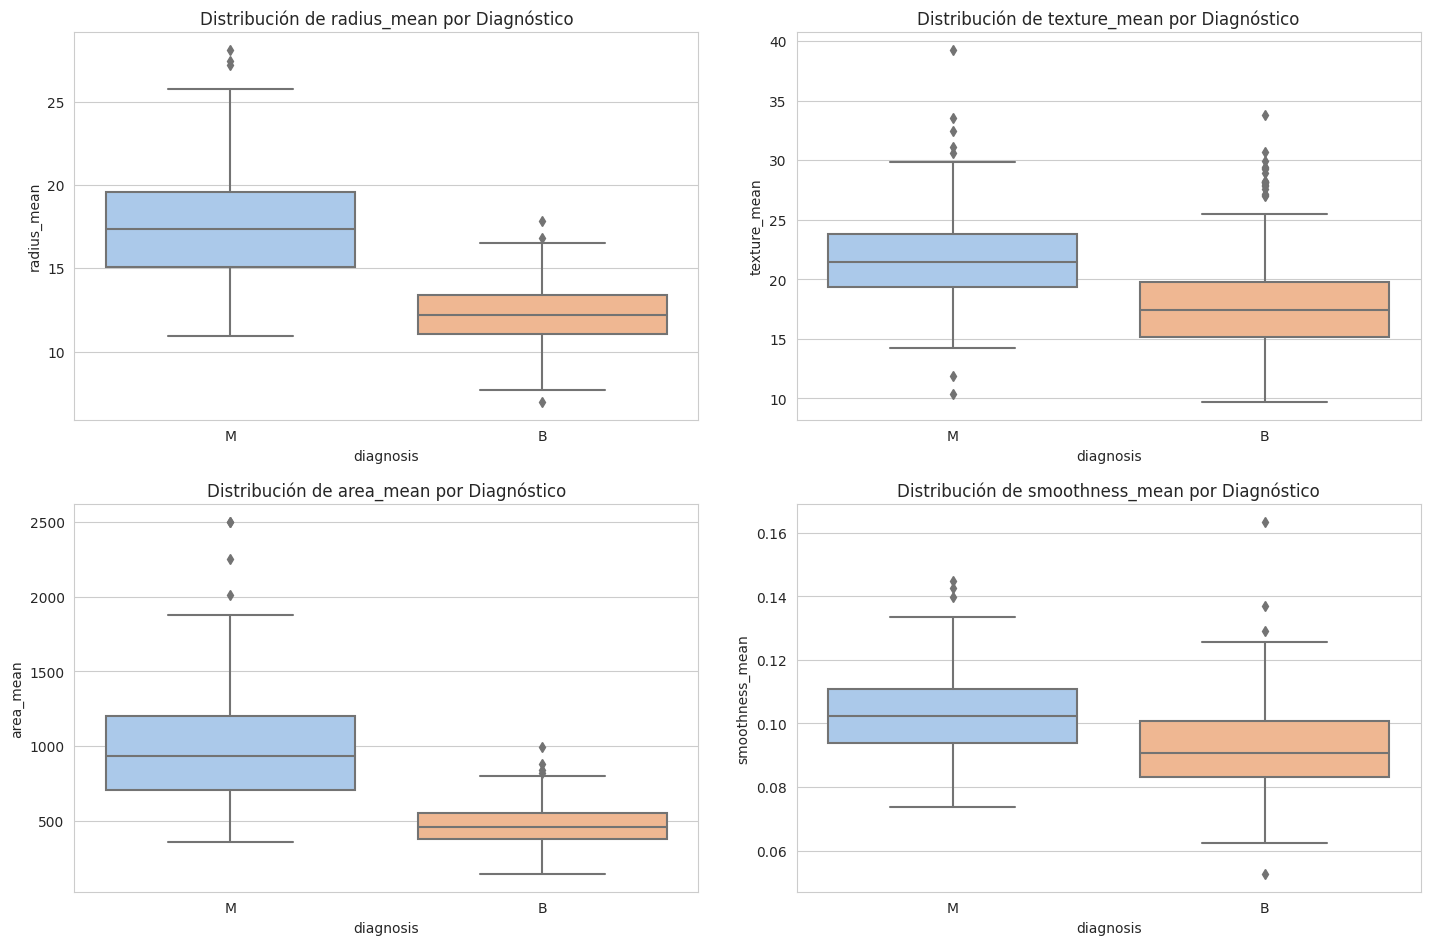

In [ ]:
# Comparando las distribuciones de características entre diagnósticos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Ajustar espacio entre gráficos
fig.tight_layout(pad=4.0)

for i, feature in enumerate(features[:2]):
    # Primera fila: radius_mean y texture_mean
    sns.boxplot(x=data['diagnosis'], y=data[feature], ax=axes[0, i], palette='pastel')
    axes[0, i].set_title(f'Distribución de {feature} por Diagnóstico')

    # Segunda fila: area_mean y smoothness_mean
    sns.boxplot(x=data['diagnosis'], y=data[features[i+2]], ax=axes[1, i], palette='pastel')
    axes[1, i].set_title(f'Distribución de {features[i+2]} por Diagnóstico')

plt.show()

Las gráficas muestran cómo varían las características seleccionadas entre tumores benignos (B) y malignos (M):

**1. radius_mean**: Los tumores malignos tienden a tener un radio medio más grande en comparación con los benignos.  
**2. texture_mean**: Los tumores malignos también muestran una mayor variabilidad en la textura media y, en promedio, tienen valores más altos que los benignos.  
**3. area_mean**: Similar al radio medio, los tumores malignos tienden a tener un área media más grande.  
**4. smoothness_mean**: No hay una diferencia significativa en la suavidad media entre los dos tipos de tumores, aunque los tumores malignos muestran una ligera tendencia a tener valores más altos.  

Estas observaciones sugieren que características como el radio medio y el área media podrían ser indicativos del tipo de tumor.

# Paso 5: Interpretación de resultados

A partir del EDA realizado, podemos concluir que:  

1. El conjunto de datos está bien equilibrado en términos de diagnósticos, aunque hay más tumores benignos que malignos.
2. Características como radius_mean y area_mean muestran claras diferencias entre tumores benignos y malignos, lo que podría ser útil para la clasificación.
3. Las correlaciones entre las características sugieren que algunas de ellas podrían ser redundantes (por ejemplo, radius_mean y area_mean).